In [14]:
#coding=utf-8
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

% matplotlib inline

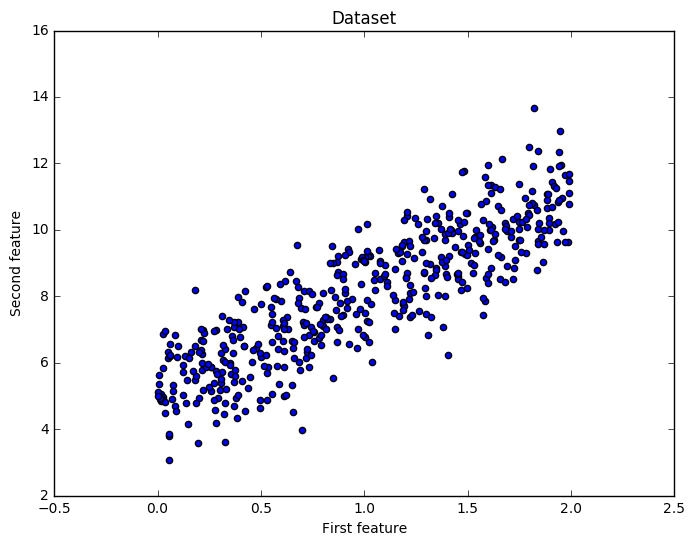

In [15]:
# sample data
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
class LinearRegression(object):
    def __init__(self):
        pass
    
    def fit(self, X, y, learning_rate = 0.01, n_iters=100, tol=0.0001):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(shape=(n_features, 1))
        self.bias = 0
        
        costs = []
        
        for i in range(n_iters):
            y_pre = np.dot(X, self.weights) + self.bias
            cost = 0.5 * np.sum((y_pre - y) ** 2) / n_samples
            
            if len(costs) > 0 and abs(costs[-1] - cost) <= tol:
                print 'iters {} stop!'.format(i)
                break
            
            costs.append(cost)
            dw = 1.0 / n_samples * np.dot(X.T, y_pre - y)
            db = 1.0 / n_samples * np.sum(y_pre - y)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
        
        return self.weights, self.bias, costs
    
    def predict(self, X):
        return np.dot(X.T, self.weights) + self.bias            

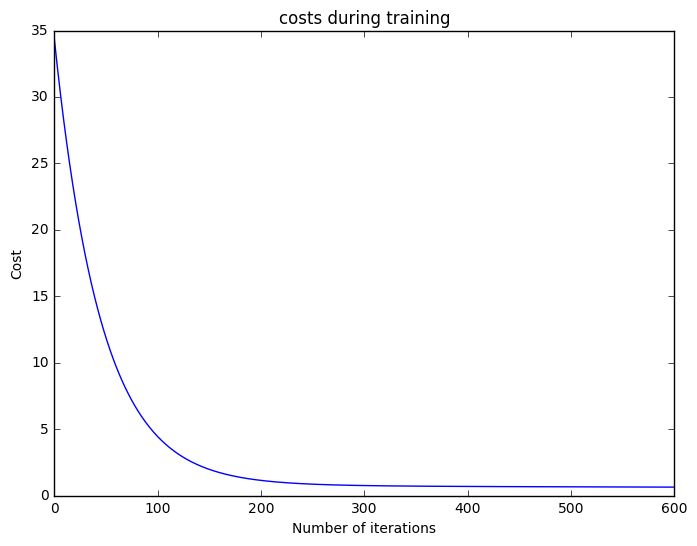

In [18]:
n_iters=600
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.fit(X_train, y_train, learning_rate=0.005, n_iters=n_iters)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("costs during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()